In [31]:
!pip3 install opencv-python
import cv2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
img = cv2.imread("/Users/paruldiwakar/Desktop/twitter_368446626ae104e8ec2a00c78e47956c.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

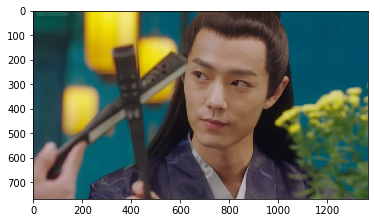

In [33]:
plt.imshow(img)
plt.show()

In [9]:
from nltk.corpus import brown
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/paruldiwakar/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [14]:
brown.categories()

['editorial', 'hobbies', 'lore', 'news', 'religion', 'reviews']

In [15]:
data =  brown.sents(categories='hobbies')

In [16]:
len(data)

4193

In [17]:
" ".join(data[89])

'Place a suitably-loaded barbell across them ; ;'

# Bag of Words

1.getting the data 

2.tokenization(corpus->sentences->words),stop word removal

3.stemming/lemmatization

4.building a vocab(list of unique words)

5.vectorization(size = |vocab size|)

6.classification

In [ ]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [ ]:
doc = """Mo Dao Zu Shi is the story of two cultivators. their names are Wei Wuxian and Lan Wangji.
        wwx and lwj together fight the demons."""

sentence = "hello my name is parul@gmail.com and i love exo "

In [ ]:
sents = sent_tokenize(doc)

In [ ]:
sents

In [ ]:
("~").join(word_tokenize(sents[0]))

# Stopwords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
sw = set(stopwords.words('english'))

In [ ]:
print(sw)

In [ ]:
def sw_removal(text,sw):
    
    useful_words = [w for w in text if w not in sw]
    
    return useful_words

In [ ]:
" ".join(sw_removal(sents[0].split(" "),sw))

In [ ]:
'mo' in sw

# Tokenization using RegEx

In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
tk = RegexpTokenizer('[a-zA-Z@.]+')
tk1 = RegexpTokenizer('[a-zA-Z]+')

In [ ]:
useful_text = tk.tokenize(sentence)

In [ ]:
useful_text

In [ ]:
sentence.split(" ")

In [ ]:
text = """Wei Wuxian became was becoming infamous by the name Yiling Laozu 
          but Haunguag jun stood by his side."""

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer,PorterStemmer

In [ ]:
ps = PorterStemmer()


In [ ]:
ps.stem('becoming')

In [ ]:
ss = SnowballStemmer('english')

In [ ]:
ss.stem('jumping')

#Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
wn = WordNetLemmatizer()

In [ ]:
wn.lemmatize('jumping')

### Converting a given sentenceinto Vector

In [ ]:
corpus = [
       'My favourite movie is Iron Man',
       'My favourite show is The Untames',
       'My favourite group is Exo',
       'I want to travel through a Wormhole'
      ]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv  = CountVectorizer()

In [ ]:
vectorized_corpus = cv.fit_transform(corpus)

In [ ]:
vectorized_corpu = vectorized_corpus.toarray()

In [ ]:
vectorized_corpus[3]

In [ ]:
cv.vocabulary_

In [ ]:
len(vectorized_corpus[3])

In [ ]:
len(cv.vocabulary_.keys())

### Given a list of numbers ,how to find the sentence

#### Reverse Mapping

In [ ]:
numbers = vectorized_corpus[2]
numbers

In [ ]:
#jumbled sentence because bag of words

cv.inverse_transform(numbers)

#### vectorization and stopwerd removal

In [ ]:
def myTokenizer(doc):
    
    words = tk.tokenize(doc.lower())
    words = sw_removal(words,sw)
    return words

In [ ]:
myTokenizer("THIS IS SOME WEIRD SHIT BHUHH")

In [ ]:
cv = CountVectorizer(tokenizer=myTokenizer)

In [ ]:
vectorized_corpus = cv.fit_transform(corpus).toarray()

In [ ]:
vectorized_corpus


In [ ]:
cv.inverse_transform(vectorized_corpus)

In [ ]:
# For Test Data
test_corpus = [
       'My favourite superhero is Iron Man',
]

In [ ]:
cv.transform(test_corpus).toarray()

### More ways to Create Features
- unigram
- bigram
- trigram
- n-gram
- TF-IDF Normalization

In [ ]:
sent1 = ["this is the best show"]
sent2 = ["this is not a good show"]

In [ ]:
docs = [sent1[0],sent2[0]]
cv = CountVectorizer(ngram_range=(1,2))

In [ ]:
cv.fit_transform(docs).toarray()

In [ ]:
cv.vocabulary_


### More ways to Create Features
- avoid features that occur often as they contain less info
- info decreases as frequency increases
- so we define 'term document frequency' that asscocites weights with each feature


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf  =TfidfVectorizer()

In [ ]:
vc = tfidf.fit_transform(docs).toarray()

In [ ]:
tfidf.vocabulary_